In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## importing data

In [283]:
data= pd.read_csv('/Users/vidhudinil/Downloads/car_age_price.csv')

In [284]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [285]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [286]:
data['Year'].nunique()

8

In [287]:
data['Price'].nunique()

35

In [288]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [290]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [291]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [292]:
corr_matrix = data.corr()

In [293]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
## split the data 

In [296]:
y = data['Price']


In [297]:
x=data.drop('Price',axis=1)

In [255]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [298]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [299]:
x.shape

(112, 1)

In [300]:
y.shape

(112,)

In [301]:
y= data[['Price']]

In [302]:
y

,Price
0,465000
1,755000
2,700000
3,465000
4,465000
...,...
107,375000
108,300000
109,425000
110,420000


In [303]:
type(y_train)

pandas.core.frame.DataFrame

In [304]:
y.shape

(112, 1)

In [305]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size =0.2)

In [306]:
x_train.shape

(89, 1)

In [307]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [308]:
x_test.shape

(23, 1)

In [309]:
y_test.shape

(23, 1)

In [310]:
y_train.shape

(89, 1)

In [ ]:
## Linear Regression model

In [311]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


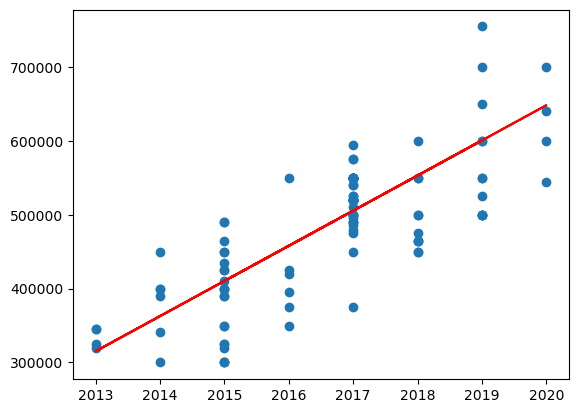

In [312]:
plt.scatter(x,y,label = 'data')
plt.plot(x_test,linear_regression.predict(x_test),color = 'red',label='Linear Regression')

In [ ]:
##Predicting the price

In [313]:
pred_price_of_2022_linear_regression=linear_regression.predict([[2022]])[0]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [314]:
print('The predicted price for 2022 is',pred_price_of_2022_linear_regression)

The predicted price for 2022 is [743601.61594504]


In [ ]:
## Lasso Regression

In [318]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso()
model = lasso_regression.fit(x_train,y_train)
predictions = model.predict(y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


In [ ]:
##Predicting the price

In [319]:
pred_price_of_2022_linear_regression=lasso_regression.predict([[2022]])[0]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [320]:
print('The predicted price for 2022 is',pred_price_of_2022_lasso_regression)

The predicted price for 2022 is 743599.3742714375


In [321]:
lasso_regression_score = lasso_regression.score(x_test, y_test)

In [280]:
lasso_regression_score

0.3675999284778446

In [ ]:
## Lasso is performing better 